# Estudo Algoritmos de Agrupamento.
- O objetivo deste notebook é o estudo dos algoritmos: KMeans, Agrupamento Hierárquico (AgglomerativeClustering) e DBSCANde do scikit-learn.
- Vamos utilizar nesse estudo o dataset 'credit-card-clients.csv'.
- Iremos fazer uma breve comparação entre os resultados destes dos algoritmos para esta base dados.
- Este dataset contém 24 atributos e 30.001 instâncias (linhas). 

  

In [33]:
# Importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Importando o dataset
base = pd.read_csv('./credit-card-clients.csv', header = 1)

In [22]:
# Verificando o shape do dataset
base.shape

(30000, 25)

In [23]:
# Visualiza as primeira linhas
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# Verificando os atributos núméricos.
base.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Pré-processamento - Tratamento dos dados

In [36]:
# Vamos criar uma coluna com a soma de das contas do cliente
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [37]:
# Seleciona os atributos previsores
# Não vamos considerar as colunas "id" e "date". A coluna "price" será o valor que vamos tentar prever. 
atributos = base.iloc[:, [1,25]].values
atributos.shape

(30000, 2)

In [38]:
atributos

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [39]:
# StandardScaler para colocar todos os valores na mesma escala (escalonamento).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

# Criando os Modelos de Previsão para comparação

# Criando o modelo com o Algoritmo de Agrupamento KMeans

Text(0, 0.5, 'WCSS')

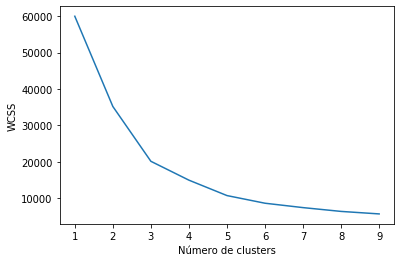

In [70]:
# Verificando a quantidade de Clusters ideal para este conjunto de dados.
# Basicamente existem três formas de fazer isso:
#    1 - Conhecimento Prévio da quatidade de Clusters;
#    2 - Sem conhecimento prévio da quatidade de Clusters, podemos usar a regra geral dada pela fórmula: cluters = Raiz quadrada de N/2, onde N é quatidade de registros;
#    3 - Utilizando o Elbow Method;
# Aqui vamos usar o Elbow Method (https://en.wikipedia.org/wiki/Elbow_method_(clustering))
# Após o valor indicado pelo “cotovelo” (curva acentuada) no gráfico indica que não possui ganho em relação ao aumento de clusters.
# Nesse ponto, significa que o método encontrou o número ideal para o argumento k.
# Obs: Nenhum destes métodos garante encontrar a quantidade ideal de cluters, para isso é necessário realizar diversos testes na base de dados.

# Para esse estudo vamos considerar o número de Clusters igual a 4.

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(atributos)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [71]:
# Cria o modelo de agrupamgento KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes_kmeans = kmeans.fit_predict(atributos)


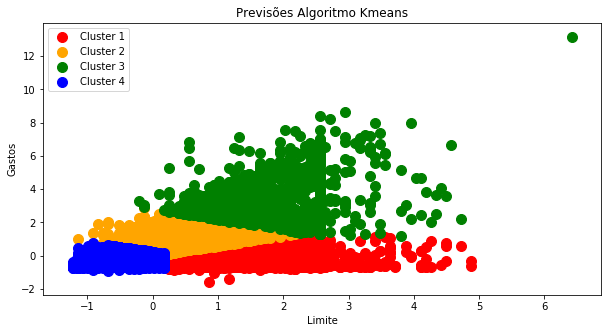

In [72]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Kmeans')
plt.scatter(atributos[previsoes_kmeans == 0, 0], atributos[previsoes_kmeans == 0, 1], s = 100, c = 'red',    label = 'Cluster 1')
plt.scatter(atributos[previsoes_kmeans == 1, 0], atributos[previsoes_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes_kmeans == 2, 0], atributos[previsoes_kmeans == 2, 1], s = 100, c = 'green',  label = 'Cluster 3')
plt.scatter(atributos[previsoes_kmeans == 3, 0], atributos[previsoes_kmeans == 3, 1], s = 100, c = 'blue',   label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [90]:
# Incluindo na base o cluster previsto para regitro.
base_agrupada_kmeans = np.column_stack((base, previsoes_kmeans))
base_agrupada_kmeans = base_agrupada_kmeans[base_agrupada_kmeans[:,26].argsort()]

In [119]:
# Incluindo na base o cluster previsto para regitro.
df_kmeans = base
df_kmeans['Cluster'] = previsoes_kmeans
df_kmeans.groupby(['Cluster'])['Cluster'].count()

Cluster
0     7952
1     4413
2     1298
3    16337
Name: Cluster, dtype: int64

(30000, 27)

# Criando o modelo com o Algoritmo Agrupamento Hierárquico (AgglomerativeClustering)

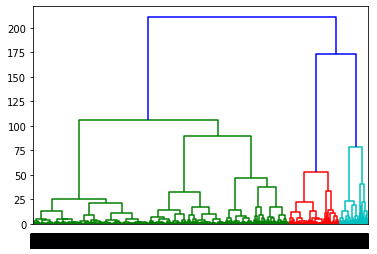

In [77]:
# Dendrograma é um tipo específico de representação icónica que organiza determinados fatores e variáveis (https://pt.wikipedia.org/wiki/Dendrograma).

# Dendograma – Visualizando a Análise de Cluster
# Usa-se o dendograma para visualizar o processo de clusterização passo a passo, assim como analisar os níveis de distância dos clusters formados. 
# Um bom ponto de decisão da clusterização final é onde os valores de distância mudam consideravelmente. 
# Para a decisão do agrupamento final também devem ser avaliados se os clusters formados fazem sentido para o problema.
# https://www.abgconsultoria.com.br/blog/o-que-e-analise-de-cluster/
 
# Para esse estudo vamos considerar o número de Clusters igual a 4.

from scipy.cluster.hierarchy import dendrogram, linkage

dendrograma = dendrogram(linkage(atributos, method = 'ward'))

In [84]:
# Cria o modelo de agrupamgento Hierárquico
from sklearn.cluster import AgglomerativeClustering

aghier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
previsoes_aghier = aghier.fit_predict(atributos)


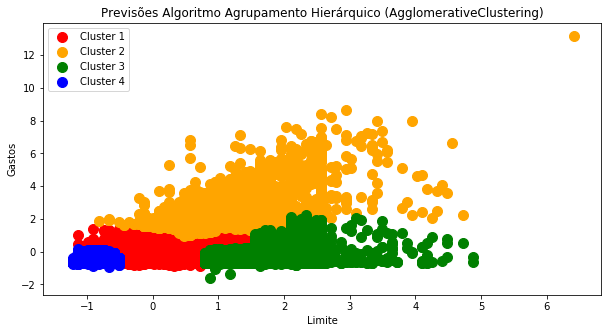

In [85]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Agrupamento Hierárquico (AgglomerativeClustering)')
plt.scatter(atributos[previsoes_aghier == 0, 0], atributos[previsoes_aghier == 0, 1], s = 100, c = 'red',    label = 'Cluster 1')
plt.scatter(atributos[previsoes_aghier == 1, 0], atributos[previsoes_aghier == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes_aghier == 2, 0], atributos[previsoes_aghier == 2, 1], s = 100, c = 'green',  label = 'Cluster 3')
plt.scatter(atributos[previsoes_aghier == 3, 0], atributos[previsoes_aghier == 3, 1], s = 100, c = 'blue',   label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [121]:
# Incluindo na base o cluster previsto para regitro.
base_agrupada_aghier = np.column_stack((base, previsoes_aghier))
base_agrupada_aghier = base_agrupada_aghier[base_agrupada_aghier[:,26].argsort()]

In [122]:
# Incluindo na base o cluster previsto para regitro.
df_aghier = base
df_aghier['Cluster'] = previsoes_aghier
df_aghier.groupby(['Cluster'])['Cluster'].count()

Cluster
0    12566
1     2561
2     4480
3    10393
Name: Cluster, dtype: int64

In [123]:
# Criando o modelo com o Algoritmo Agrupamento DBSCAN

In [164]:
# Cria o modelo de agrupamgento Hierárquico
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.35, min_samples = 5)
previsoes_dbscan = dbscan.fit_predict(atributos)


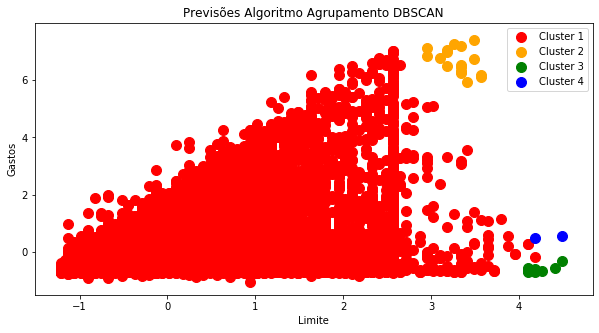

In [165]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Agrupamento DBSCAN')
plt.scatter(atributos[previsoes_dbscan == 0, 0], atributos[previsoes_dbscan == 0, 1], s = 100, c = 'red',    label = 'Cluster 1')
plt.scatter(atributos[previsoes_dbscan == 1, 0], atributos[previsoes_dbscan == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes_dbscan == 2, 0], atributos[previsoes_dbscan == 2, 1], s = 100, c = 'green',  label = 'Cluster 3')
plt.scatter(atributos[previsoes_dbscan == 3, 0], atributos[previsoes_dbscan == 3, 1], s = 100, c = 'blue',   label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [166]:
unicos, quantidade = np.unique(previsoes_dbscan, return_counts = True)

In [167]:
unicos

array([-1,  0,  1,  2,  3])

In [168]:
quantidade

array([   56, 29915,    17,    10,     2])

In [169]:
# Incluindo na base o cluster previsto para regitro.
df_dbscan = base
df_dbscan['Cluster'] = previsoes_dbscan
df_dbscan.groupby(['Cluster'])['Cluster'].count()

Cluster
-1       56
 0    29915
 1       17
 2       10
 3        2
Name: Cluster, dtype: int64

# Verificando a performance dos Modelos

# Conclusão:

